In [45]:
%run SAT_help_functions.ipynb
%matplotlib inline

In [46]:
def transform_df_DDM_dif(df_SAT):
    
    params = ["Drift Rate", "Boundary Separation", "Non-decision Time"]

    df_SAT1 = df_SAT[["Drift Rate Speed", "Boundary Separation Speed", "Non-decision Time Speed"]]
    df_SAT1 = pd.DataFrame(np.array(df_SAT1), columns = params)
    #df_SAT1["SAT"] = ["Speed"]*len(df_SAT1)

    df_SAT2 = df_SAT[["Drift Rate Accuracy", "Boundary Separation Accuracy", "Non-decision Time Accuracy"]]
    df_SAT2 = pd.DataFrame(np.array(df_SAT2), columns = params)
    #df_SAT2["SAT"] = ["Accuracy"]*len(df_SAT2)
    
    df_SAT = df_SAT1-df_SAT2
    df_SAT_melted = pd.melt(df_SAT, #d_vars = ["SAT"], 
                    value_vars=params,
                    var_name = "Parameter", value_name = "Difference")
    return df_SAT_melted

In [47]:
def transform_df_OUM_dif(df_SAT):
    
    params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]

    df_SAT1 = df_SAT[["Drift Rate Speed", "Boundary Separation Speed", "Non-decision Time Speed", "Self-excitation Speed"]]
    df_SAT1 = pd.DataFrame(np.array(df_SAT1), columns = params)
    #df_SAT1["SAT"] = ["Speed"]*len(df_SAT1)

    df_SAT2 = df_SAT[["Drift Rate Accuracy", "Boundary Separation Accuracy", "Non-decision Time Accuracy", "Self-excitation Accuracy"]]
    df_SAT2 = pd.DataFrame(np.array(df_SAT2), columns = params)
    #df_SAT2["SAT"] = ["Accuracy"]*len(df_SAT2)
    
    df_SAT = df_SAT1-df_SAT2
    df_SAT_melted = pd.melt(df_SAT, #d_vars = ["SAT"], 
                    value_vars=params,
                    var_name = "Parameter", value_name = "Difference")
    

    return df_SAT_melted

In [48]:
def transform_df_LCTM_dif(df_SAT):
    
    params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Collapse Rate"]

    df_SAT1 = df_SAT[["Drift Rate Speed", "Boundary Separation Speed", "Non-decision Time Speed", "Collapse Speed"]]
    df_SAT1 = pd.DataFrame(np.array(df_SAT1), columns = params)
    #df_SAT1["SAT"] = ["Speed"]*len(df_SAT1)

    df_SAT2 = df_SAT[["Drift Rate Accuracy", "Boundary Separation Accuracy", "Non-decision Time Accuracy", "Collapse Accuracy"]]
    df_SAT2 = pd.DataFrame(np.array(df_SAT2), columns = params)
    #df_SAT2["SAT"] = ["Accuracy"]*len(df_SAT2)
    
    df_SAT = df_SAT1-df_SAT2
    df_SAT_melted = pd.melt(df_SAT, #d_vars = ["SAT"], 
                    value_vars=params,
                    var_name = "Parameter", value_name = "Difference")
    

    return df_SAT_melted

In [27]:
params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]

df_SAT1 = df_SAT[["Drift Rate Speed", "Boundary Separation Speed", "Non-decision Time Speed", "Self-excitation Speed"]]
df_SAT1 = pd.DataFrame(np.array(df_SAT1), columns = params)
#df_SAT1["SAT"] = ["Speed"]*len(df_SAT1)

df_SAT2 = df_SAT[["Drift Rate Accuracy", "Boundary Separation Accuracy", "Non-decision Time Accuracy", "Self-excitation Accuracy"]]
df_SAT2 = pd.DataFrame(np.array(df_SAT2), columns = params)
#df_SAT2["SAT"] = ["Accuracy"]*len(df_SAT2)

df_SAT_jasp = df_SAT1-df_SAT2

In [28]:
#df_SAT_jasp.to_csv("jasp.csv")

In [49]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['D13', 'D19', 'E17', 'L17', 'R14', 'W08']

DDM_all = pd.DataFrame()
for i in range(6):
    
    df_SAT = pd.read_csv('results/DDM2v2a2terresult'+datasets[i]+'.csv')
    
    if datasets[i] =='Wagenmakers2008':
        df_SAT = df_SAT.groupby(by="Participant").mean()

    
    df_SAT_melted = transform_df_DDM_dif(df_SAT)
    df_SAT_melted["Dataset"] = dataset_names[i]
    
    DDM_all = pd.concat((DDM_all,df_SAT_melted))
    
#g = sns.catplot(kind = "box", data=DDM_all, x="Dataset", y="Difference", col="Parameter",hue = "Dataset")
#g.set_xticklabels(rotation=30)

In [50]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['D13', 'D19', 'E17', 'L17', 'R14', 'W08']

OUM_all = pd.DataFrame()
for i in range(6):
    
    df_SAT = pd.read_csv('results/OUMfullresult'+datasets[i]+'.csv')
    if datasets[i] =='Wagenmakers2008':
        df_SAT = df_SAT.groupby(by="Participant").mean()

    df_SAT_melted = transform_df_OUM_dif(df_SAT)
    df_SAT_melted["Dataset"] = dataset_names[i]
    
    OUM_all = pd.concat((OUM_all,df_SAT_melted))
    
#g = sns.catplot(kind = "box", data=OUM_all, x="Dataset", y="Difference", col="Parameter",hue = "Dataset")
#g.set_xticklabels(rotation=30)

In [51]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['D13', 'D19', 'E17', 'L17', 'R14', 'W08']

LCTM_all = pd.DataFrame()
for i in range(6):
    
    df_SAT = pd.read_csv('results/DDM2v2a2c2terresult'+datasets[i]+'.csv')
    if datasets[i] =='Wagenmakers2008':
        df_SAT = df_SAT.groupby(by="Participant").mean()

    df_SAT_melted = transform_df_LCTM_dif(df_SAT)
    df_SAT_melted["Dataset"] = dataset_names[i]
    
    LCTM_all = pd.concat((LCTM_all,df_SAT_melted))
    
#g = sns.catplot(kind = "box", data=OUM_all, x="Dataset", y="Difference", col="Parameter",hue = "Dataset")
#g.set_xticklabels(rotation=30)

/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_28745/1706852482.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax = ax[i], data=DDM_all[DDM_all["Parameter"]==params[i]], x="Dataset", y="Difference",edgecolor=["grey"]*6, palette=["white"]*6,linewidth=2)
/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_28745/1706852482.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax = ax[i], data=DDM_all[DDM_all["Parameter"]==params[i]], x="Dataset", y="Difference",edgecolor=["grey"]*6, palette=["white"]*6,linewidth=2)
/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_28745/1706852482.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

Text(-0.2, 1.1, '')

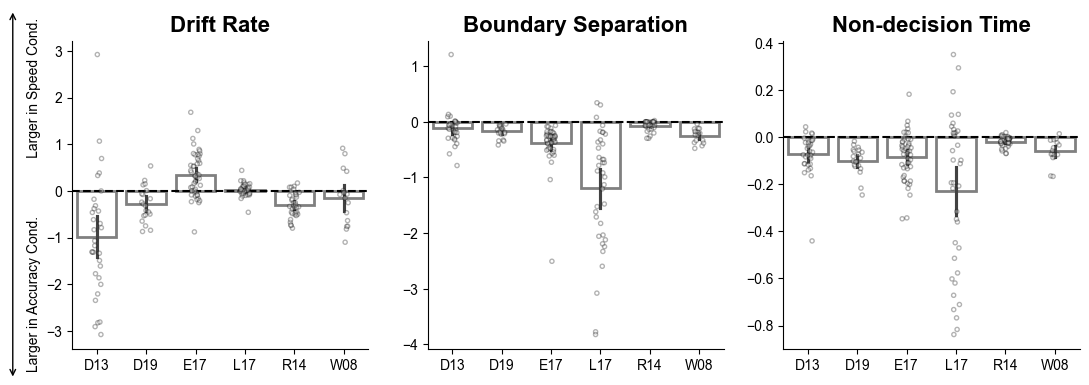

In [31]:
params = ["Drift Rate", "Boundary Separation", "Non-decision Time"]

fig, ax = plt.subplots(1,3,figsize=(13,4))

for i in range(3):

    sns.barplot(ax = ax[i], data=DDM_all[DDM_all["Parameter"]==params[i]], x="Dataset", y="Difference",edgecolor=["grey"]*6, palette=["white"]*6,linewidth=2)
    sns.stripplot(ax = ax[i], data=DDM_all[DDM_all["Parameter"]==params[i]], x="Dataset", y="Difference",hue = "Dataset", palette=["white"]*6, alpha=.3,edgecolor="black",linewidth=1,size = 3)
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].axhline(y=0,linestyle="--",color='black') 
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_title(params[i], font = "Arial", size = 16, weight='bold') 
    #ax[i].get_legend().remove()


ax[0].set_ylabel("Larger in Accuracy Cond.               Larger in Speed Cond.", font = "Arial", size = 10)

#plt.arrow(x=-4, y=0, dx=0, dy=1,shape = "full")
ax[0].annotate('', xy=(-0.2, -0.1), xycoords='axes fraction', xytext=(-0.2, 1.1),
            arrowprops=dict(arrowstyle="<->", color='black'))

In [32]:
from statannotations.Annotator import Annotator


In [33]:
from statannotations.Annotator import Annotator
from statannot import add_stat_annotation

box_pairs=[('D13', 'D19')]
annotator = Annotator(ax[0], box_pairs, data=OUM_all[OUM_all["Parameter"]==params[0]], x="Dataset", y="Difference")
annotator.configure(test='t-test_ind', text_format='star',comparisons_correction=None) #, loc='outside' Bonferroni
annotator.apply_and_annotate()

AttributeError: module 'seaborn.categorical' has no attribute '_BoxPlotter'

<Figure size 640x480 with 0 Axes>

In [8]:
sns.__version__

'0.13.2'

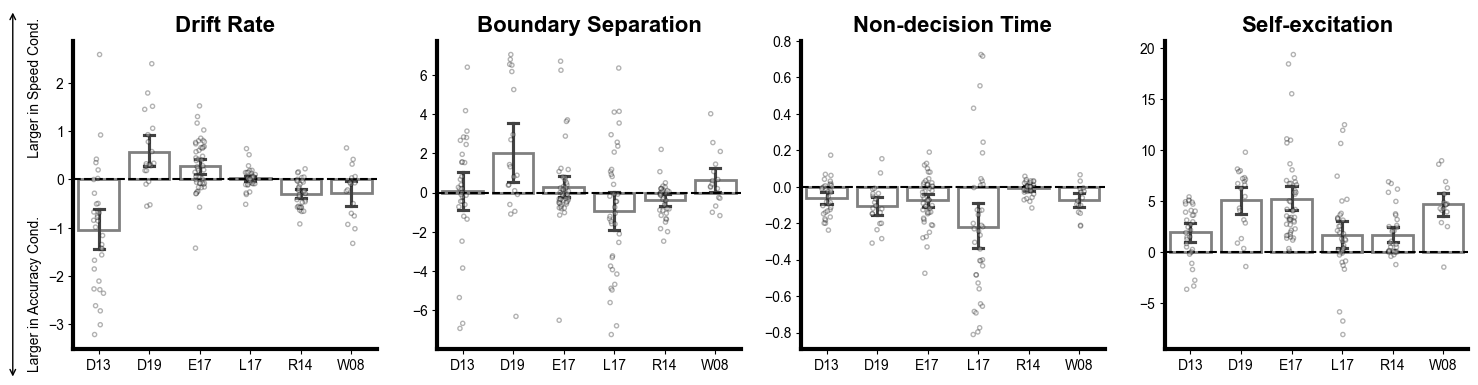

In [58]:
params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]
fig, ax = plt.subplots(1,4,figsize=(18,4))

for i in range(4):
    sns.stripplot(ax = ax[i], data=OUM_all[OUM_all["Parameter"]==params[i]], x="Dataset", y="Difference",hue = "Dataset", palette=["white"]*6, alpha=.3,edgecolor="black",linewidth=1,size = 3)
    sns.barplot(ax = ax[i], data=OUM_all[OUM_all["Parameter"]==params[i]], x="Dataset", y="Difference"
        ,edgecolor=["grey"]*6, color="white",linewidth=2,capsize=0.2) # 
    #sns.scatterplot(ax = ax[i], data=OUM_all_p[OUM_all_p["Parameter"]==params[i]],x="Dataset", y="Significance",marker = "*",s=200)
    
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].spines[['left', 'bottom']].set_linewidth(3)
    ax[i].axhline(y=0,linestyle="--",color='black') 
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_title(params[i], font = "Arial", size = 16, weight='bold') 
    #ax[i].get_legend().remove()

ax[0].set_ylabel("Larger in Accuracy Cond.               Larger in Speed Cond.", font = "Arial", size = 10)

#plt.arrow(x=-4, y=0, dx=0, dy=1,shape = "full")
ax[0].annotate('', xy=(-0.2, -0.1), xycoords='axes fraction', xytext=(-0.2, 1.1),
            arrowprops=dict(arrowstyle="<->", color='black'))


plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

#plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Figures/fig2_new.pdf")

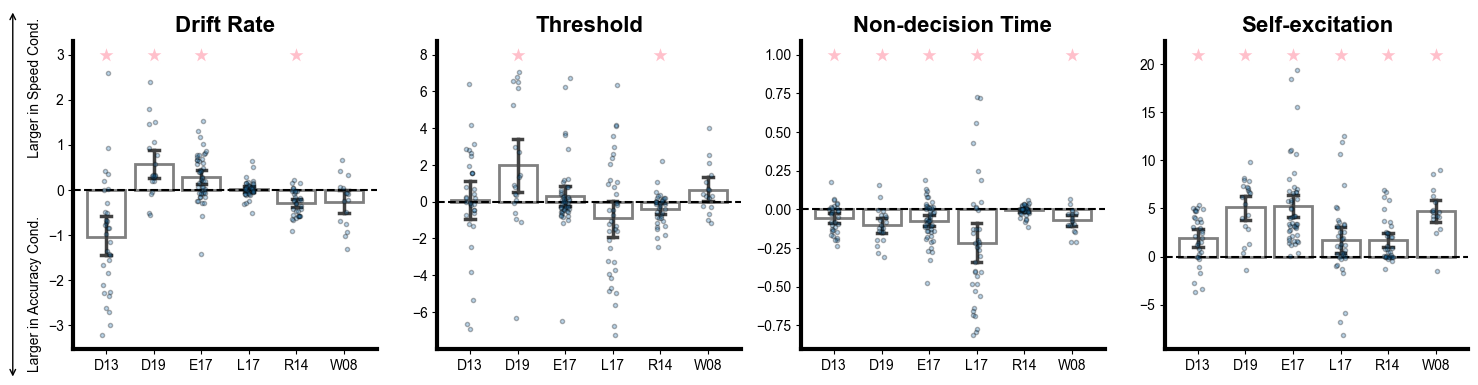

In [59]:
params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]
fig, ax = plt.subplots(1,4,figsize=(18,4))

for i in range(4):
    sns.stripplot(ax = ax[i], data=OUM_all[OUM_all["Parameter"]==params[i]], x="Dataset", y="Difference", alpha=.3,edgecolor="black",linewidth=1,size = 3)
    sns.barplot(ax = ax[i], data=OUM_all[OUM_all["Parameter"]==params[i]], x="Dataset", y="Difference", edgecolor=["grey"]*6, color="white", linewidth=2,errorbar=('ci', 95),err_kws={"linewidth": 2.5},capsize=.2)
    sns.scatterplot(ax = ax[i], data=OUM_all_p[OUM_all_p["Parameter"]==params[i]],x="Dataset", y="Significance",marker = "*",s=200,color ="pink", alpha=1)
    
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].spines[['left', 'bottom']].set_linewidth(3)
    ax[i].axhline(y=0,linestyle="--",color='black') 
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_title(params[i], font = "Arial", size = 16, weight='bold') 

ax[0].set_ylabel("Larger in Accuracy Cond.               Larger in Speed Cond.", font = "Arial", size = 10)

#plt.arrow(x=-4, y=0, dx=0, dy=1,shape = "full")
ax[0].annotate('', xy=(-0.2, -0.1), xycoords='axes fraction', xytext=(-0.2, 1.1),
            arrowprops=dict(arrowstyle="<->", color='black'))
ax[1].set_title("Threshold", font = "Arial", size = 16, weight='bold') 


plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Figures/fig2_new.pdf")

<Figure size 640x480 with 0 Axes>

In [23]:
dataset_names


['D13', 'D19', 'E17', 'L17', 'R14', 'W08']

In [36]:
OUM_all_p = OUM_all.groupby(['Parameter', 'Dataset'], as_index=False)['Difference'].agg(lambda x: scipy.stats.t.cdf(-abs(np.mean(x)*np.sqrt(len(x))/np.std(x)), len(x)-1)*2)
OUM_all_p["Significance"] = (OUM_all_p["Difference"]<0.05)*1
OUM_all_p = OUM_all_p[OUM_all_p["Significance"]==True]

sizes = [3,8,1,21]
for i in range(4):
    OUM_all_p.loc[OUM_all_p["Parameter"]==params[i],"Significance"] *= sizes[i]
OUM_all_p

,Parameter,Dataset,Difference,Significance
1,Boundary Separation,D19,1.549369e-02,8
4,Boundary Separation,R14,1.648816e-02,8
6,Drift Rate,D13,3.618373e-05,3
7,Drift Rate,D19,2.478554e-03,3
8,Drift Rate,E17,6.250922e-04,3
10,Drift Rate,R14,8.087028e-07,3
12,Non-decision Time,D13,1.031210e-03,1
13,Non-decision Time,D19,4.988721e-04,1
14,Non-decision Time,E17,2.169770e-04,1
15,Non-decision Time,L17,1.353330e-03,1


##  LCTM

In [70]:
LCTM_all_p = LCTM_all.groupby(['Parameter', 'Dataset'], as_index=False)['Difference'].agg(lambda x: scipy.stats.t.cdf(-abs(np.mean(x)*np.sqrt(len(x))/np.std(x)), len(x)-1)*2)
LCTM_all_p["Significance"] = (LCTM_all_p["Difference"]<0.05)*1
LCTM_all_p = LCTM_all_p[LCTM_all_p["Significance"]==True]

sizes = [3,2,1,2]
for i in range(4):
    LCTM_all_p.loc[LCTM_all_p["Parameter"]==params[i],"Significance"] *= sizes[i]
LCTM_all_p

,Parameter,Dataset,Difference,Significance
1,Boundary Separation,D19,7.813159e-03,2
2,Boundary Separation,E17,1.019691e-03,2
3,Boundary Separation,L17,9.476339e-07,2
4,Boundary Separation,R14,5.574797e-05,2
5,Boundary Separation,W08,1.584701e-04,2
7,Collapse Rate,D19,2.141737e-05,2
8,Collapse Rate,E17,2.184548e-05,2
11,Collapse Rate,W08,3.474128e-06,2
12,Drift Rate,D13,2.952243e-04,3
13,Drift Rate,D19,1.964191e-03,3


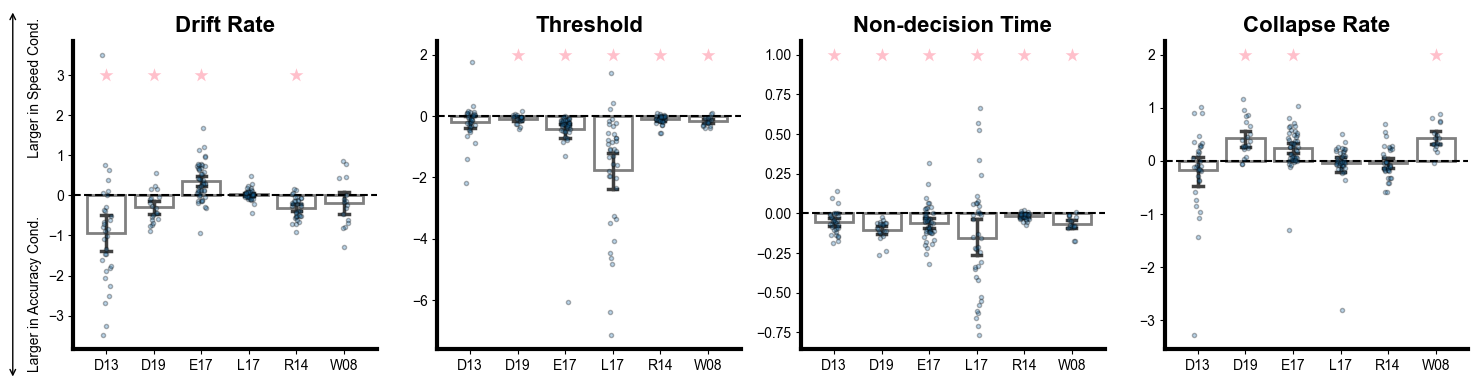

In [71]:
params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Collapse Rate"]
fig, ax = plt.subplots(1,4,figsize=(18,4))

for i in range(4):
    sns.stripplot(ax = ax[i], data=LCTM_all[LCTM_all["Parameter"]==params[i]], x="Dataset", y="Difference", alpha=.3,edgecolor="black",linewidth=1,size = 3)
    sns.barplot(ax = ax[i], data=LCTM_all[LCTM_all["Parameter"]==params[i]], x="Dataset", y="Difference", edgecolor=["grey"]*6, color="white", linewidth=2,errorbar=('ci', 95),err_kws={"linewidth": 2.5},capsize=.2)
    sns.scatterplot(ax = ax[i], data=LCTM_all_p[LCTM_all_p["Parameter"]==params[i]],x="Dataset", y="Significance",marker = "*",s=200,color ="pink", alpha=1)
    
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].spines[['left', 'bottom']].set_linewidth(3)
    ax[i].axhline(y=0,linestyle="--",color='black') 
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_title(params[i], font = "Arial", size = 16, weight='bold') 

ax[0].set_ylabel("Larger in Accuracy Cond.               Larger in Speed Cond.", font = "Arial", size = 10)

#plt.arrow(x=-4, y=0, dx=0, dy=1,shape = "full")
ax[0].annotate('', xy=(-0.2, -0.1), xycoords='axes fraction', xytext=(-0.2, 1.1),
            arrowprops=dict(arrowstyle="<->", color='black'))
ax[1].set_title("Threshold", font = "Arial", size = 16, weight='bold') 


plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

#plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Figures/fig2_new.pdf")

In [21]:
OUM_all

,Parameter,Difference,Dataset
0,Drift Rate,-0.744406,D13
1,Drift Rate,0.420909,D13
2,Drift Rate,0.000000,D13
3,Drift Rate,-2.102901,D13
4,Drift Rate,0.022561,D13
...,...,...,...
59,Self-excitation,4.851177,W08
60,Self-excitation,8.598301,W08
61,Self-excitation,8.943536,W08
62,Self-excitation,4.656148,W08


## Appendix

In [ ]:
params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]

fig, ax = plt.subplots(1,4,figsize=(18,4))

for i in range(4):
    sns.boxplot(ax = ax[i], data=OUM_all[OUM_all["Parameter"]==params[i]], x="Dataset", y="Difference",hue = "Dataset", palette=["grey"]*6, showfliers = False)
    sns.stripplot(ax = ax[i], data=OUM_all[OUM_all["Parameter"]==params[i]], x="Dataset", y="Difference",hue = "Dataset", palette=["white"]*6, alpha=.5,edgecolor="black",linewidth=1,size = 3)

    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].axhline(y=0,linestyle="--",color='black') 
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_title(params[i], font = "Arial", size = 10, weight='bold') 

ax[0].set_ylabel("Larger in Accuracy Cond.               Larger in Speed Cond.", font = "Arial", size = 10)

#plt.arrow(x=-4, y=0, dx=0, dy=1,shape = "full")
ax[0].annotate('', xy=(-0.2, -0.1), xycoords='axes fraction', xytext=(-0.2, 1.1),
            arrowprops=dict(arrowstyle="<->", color='black'))

Text(-0.2, 1.1, '')

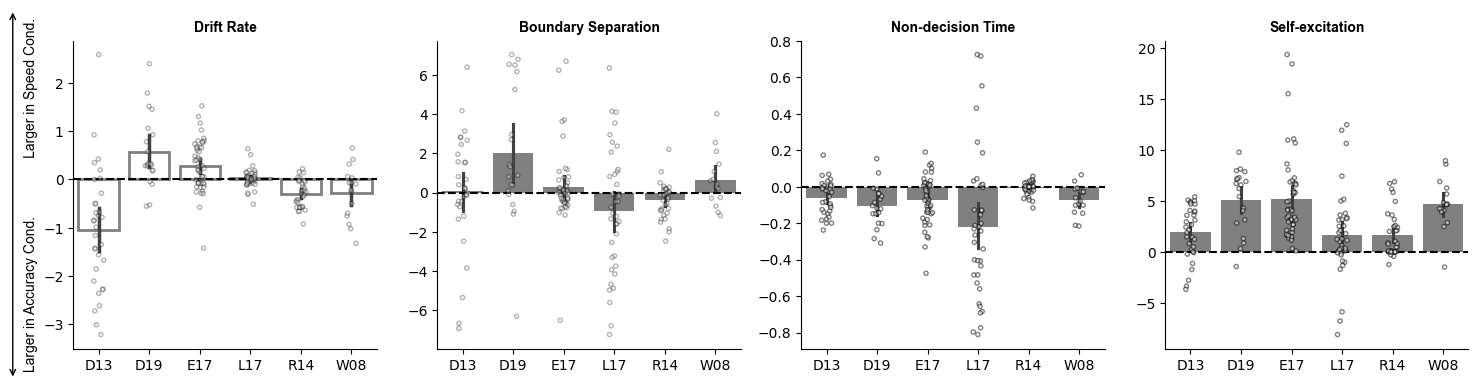

In [44]:
fig, ax = plt.subplots(1,4,figsize=(18,4))

sns.barplot(ax = ax[0], data=OUM_all[OUM_all["Parameter"]=="Drift Rate"], x="Dataset", y="Difference",hue = "Dataset", edgecolor=["grey"]*6, palette=["white"]*6,linewidth=2,errorbar=('ci', 95),err_kws={"linewidth": 2.5})
sns.stripplot(ax = ax[0], data=OUM_all[OUM_all["Parameter"]=="Drift Rate"], x="Dataset", y="Difference",hue = "Dataset", palette=["white"]*6, alpha=.3,edgecolor="black",linewidth=1,size = 3)

sns.barplot(ax = ax[1], data=OUM_all[OUM_all["Parameter"]=="Boundary Separation"], x="Dataset", y="Difference",hue = "Dataset", palette=["grey"]*6,errorbar=('ci', 95))
sns.stripplot(ax = ax[1], data=OUM_all[OUM_all["Parameter"]=="Boundary Separation"], x="Dataset", y="Difference",hue = "Dataset", palette=["white"]*6, alpha=.3,edgecolor="black",linewidth=1,size = 3)

sns.barplot(ax = ax[2], data=OUM_all[OUM_all["Parameter"]=="Non-decision Time"], x="Dataset", y="Difference",hue = "Dataset", palette=["grey"]*6,errorbar=('ci', 95))
sns.stripplot(ax = ax[2], data=OUM_all[OUM_all["Parameter"]=="Non-decision Time"], x="Dataset", y="Difference",hue = "Dataset", palette=["white"]*6, alpha=.5,edgecolor="black",linewidth=1,size = 3)

sns.barplot(ax = ax[3], data=OUM_all[OUM_all["Parameter"]=="Self-excitation"], x="Dataset", y="Difference",hue = "Dataset", palette=["grey"]*6,errorbar=('ci', 95))
sns.stripplot(ax = ax[3], data=OUM_all[OUM_all["Parameter"]=="Self-excitation"], x="Dataset", y="Difference",hue = "Dataset", palette=["white"]*6, alpha=.5,edgecolor="black",linewidth=1,size = 3)


ax[0].set_ylabel("Larger in Accuracy Cond.               Larger in Speed Cond.", font = "Arial", size = 10)



ax[1].set_ylabel("")
ax[2].set_ylabel("")
ax[3].set_ylabel("")

ax[0].set_title("Drift Rate", font = "Arial", size = 10, weight='bold') 
ax[1].set_title("Boundary Separation", font = "Arial", size = 10, weight='bold') 
ax[2].set_title("Non-decision Time", font = "Arial", size = 10, weight='bold') 
ax[3].set_title("Self-excitation", font = "Arial", size = 10, weight='bold') 

for i in range(4):
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].axhline(y=0,linestyle="--",color='black') 
    ax[i].set_xlabel("")



#plt.arrow(x=-4, y=0, dx=0, dy=1,shape = "full")
ax[0].annotate('', xy=(-0.2, -0.1), xycoords='axes fraction', xytext=(-0.2, 1.1),
            arrowprops=dict(arrowstyle="<->", color='black'))

In [43]:
sns.catplot(kind = "box", data=DDM_all, x="Parameter", y="Difference",color=".9", showfliers = False)
g = sns.stripplot(data=DDM_all, x="Parameter", y="Difference", size=5, hue = "Dataset")

g.set_xticklabels(labels = ["Drift Rate", "Boundary Separation", "Non-decision Time"],
                  rotation=30)
sns.move_legend(g, "upper right", bbox_to_anchor=(1.5, 1), frameon=False)

plt.axhline(y=0,linestyle="--",color='black') 

plt.show()

NameError: name 'DDM_all' is not defined

In [174]:
data_dir = "/Users/wangjiashun/Desktop/Reserach on SAT/datasets/Lexical Decision Data/SpeedAccData.csv"
        df = pd.read_csv(data_dir)

In [191]:
# preprocess EJ2008
data_dir = "/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/Wagenmakers2008/SpeedAccData.csv"
df = pd.read_csv(data_dir)
df = df.rename(columns={"SAT": "Cond", "RT": "Time"})
df.loc[df["Cond"]==1,"Cond"] = "Speed"
df.loc[df["Cond"]==2,"Cond"] = "Accuracy"
df.to_csv("/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/Wagenmakers2008/SpeedAccData_new.csv")
